In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Linear regression with 1 independent variable 

In [15]:
data = pd.read_csv('../../datasets/salary.csv')
data = data.iloc[: , 1:]

In [16]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [17]:
data.shape

(30, 2)

<AxesSubplot:>

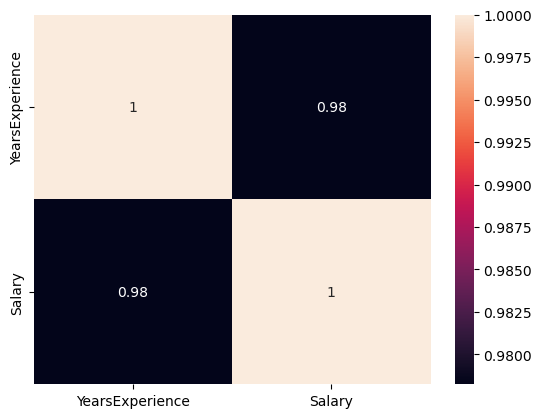

In [19]:
sns.heatmap(data=data.corr(), annot= True)

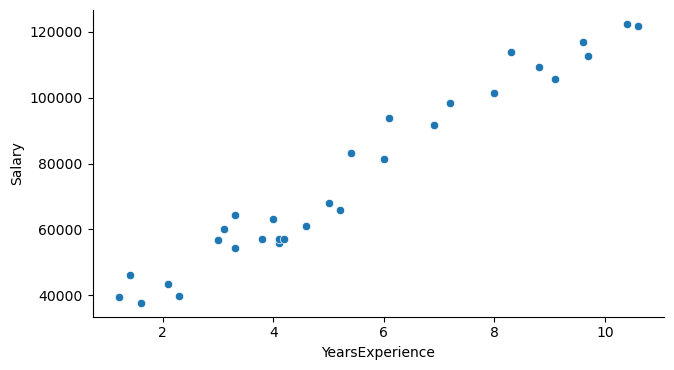

In [20]:
sns.relplot(x='YearsExperience', y='Salary', data=data,
            height=3.8, aspect=1.8, kind='scatter')

In [25]:
y = data.iloc[:,1]
X = data.iloc[:, :-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(9, 1)
(21,)
(9,)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model.coef_

array([9202.23359825])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

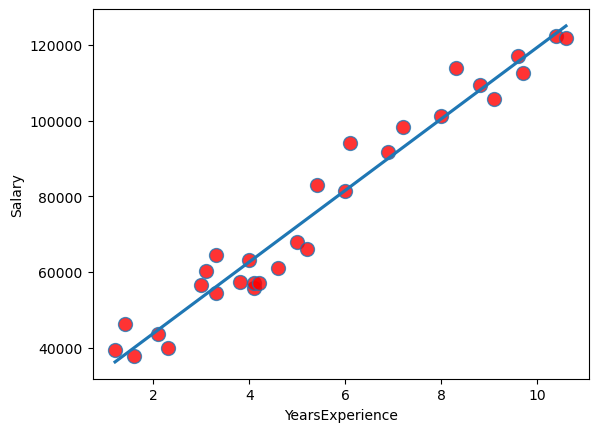

In [29]:
sns.regplot(x='YearsExperience', y='Salary', data=data, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

In [32]:
y_pred = model.predict(X_test)
y_pred

array([ 74822.41578619,  91386.43626305,  61939.28874864,  81263.97930497,
        67460.62890759,  88625.76618357, 113471.79689886,  44455.04491195,
       106110.01002026])

### Comparison of predicted salaries with the actual ones

In [33]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
17,83089.0,74822.415786
21,98274.0,91386.436263
10,63219.0,61939.288749
19,93941.0,81263.979305
14,61112.0,67460.628908
20,91739.0,88625.766184
26,116970.0,113471.796899
3,43526.0,44455.044912
24,109432.0,106110.010020


### Mean absolute error

In [36]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test,y_pred))

MAE: 5146.886734888223


### Mean square error

In [38]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 39139215.99958847


### R2 score

In [34]:
r2= r2_score(y_test, y_pred)
r2

0.9248580247217077

# Linear regression with more than 1 independent variables

In [95]:
ads = pd.read_csv('../../datasets/advertising.csv')
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<AxesSubplot:>

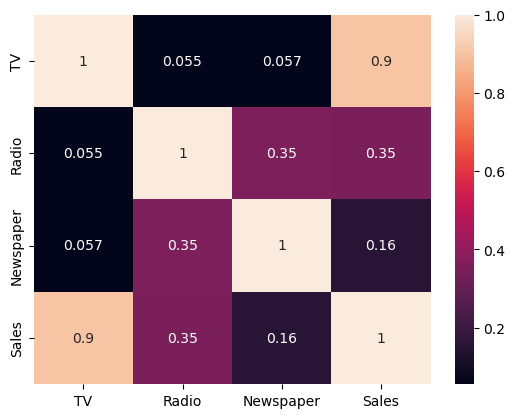

In [96]:
sns.heatmap(data=ads.corr(), annot= True)

In [97]:
X = ads.iloc[:, :-1]
y = ads.iloc[:, -1]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [99]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

### Comparison of predicted sales with the actual ones

In [87]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df.head(10)

,Actual,Predicted
18,11.3,10.689093
170,8.4,8.673711
107,12.0,9.599699
98,25.4,24.999898
177,16.7,14.735906
182,8.7,8.376049
5,7.2,10.703504
146,18.2,18.376707
12,9.2,9.967003
152,16.6,17.879468


### R2 score

In [101]:
r2_score(y_test, y_pred)

0.869205273491013

### R2 score after sorting through combinations of features

TV & Radio: 0.8695929214202679; <br>
TV & Newspapers: 0.827456128297248; <br>
Radio & Newspapers: -0.02156400492816135 <br>